In [2]:
import sys
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [12]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("C:\\Users\\redky\\OneDrive\\Documents\\College Work\\4F\\CSCE 435\\Project Results\\sample_sort\\**\\**.cali"))
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.dataframe = tk.dataframe.reset_index().set_index(["input_size"]).sort_index()
tk.show_metric_columns()
print(tk.tree(metric_column='Avg time/rank'))

(2/2) Creating Thicket: 100%|██████████| 266/266 [00:02<00:00, 130.29it/s]


  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.077 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
0.272 main
├─ 0.202 comm
│  ├─ 0.129 comm_large
│  │  ├─ 0.082 MPI_Recv
│  │  └─ 0.045 MPI_Send
│  └─ 0.072 comm_small
│     ├─ 0.069 MPI_Bcast
│     └─ 0.003 MPI_Gather
├─ 0.061 comp
│  ├─ 0.061 comp_large
│  └─ 0.000 comp_small
├─ 0.007 correctness_check
│  └─ 0.006 comm
│     └─ 0.006 comm_small
│        ├─ 0.006 MPI_Recv
│        └─ 0.000 MPI_Send
└─ 0.002 data_init_runtime
   ├─ 0.001 data_init_runtime
   └─ nan data_perturbed_init_runtime
      └─ nan data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.27 indices: {'profile': 3630412})
█ 0.24 - 0.27
█ 0.19 - 0.24
█ 0.14 - 0.19
█ 0.08 - 0.14
█ 0.03 - 0.08
█ 0.00 - 0.03

name User code    ◀  Only in left graph    ▶  Only in right graph



View Calltree

In [15]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 1024]
threads =  [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [16, 18, 20, 22, 24, 26, 28]
input_types = ["Sorted", "1_perc_perturbed", "Random", "ReverseSorted"]

# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [17]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(["2^16", "2^18", "2^20", "2^22", "2^24", "2^26", "2^28"])
    plt.xscale("log", base=2)
    plt.xticks(threads)
    ax.set_xticklabels(threads)
    ax.set_ylim(bottom=0, top=None)
    plt.show()
    return fig, ax

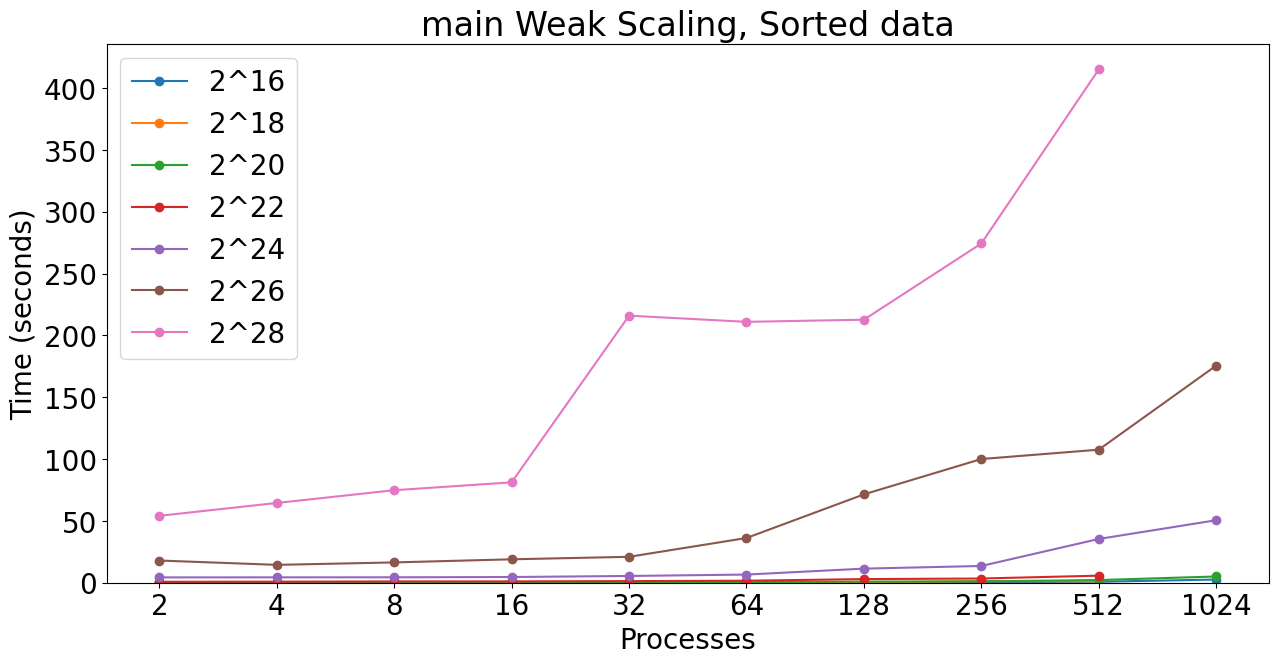

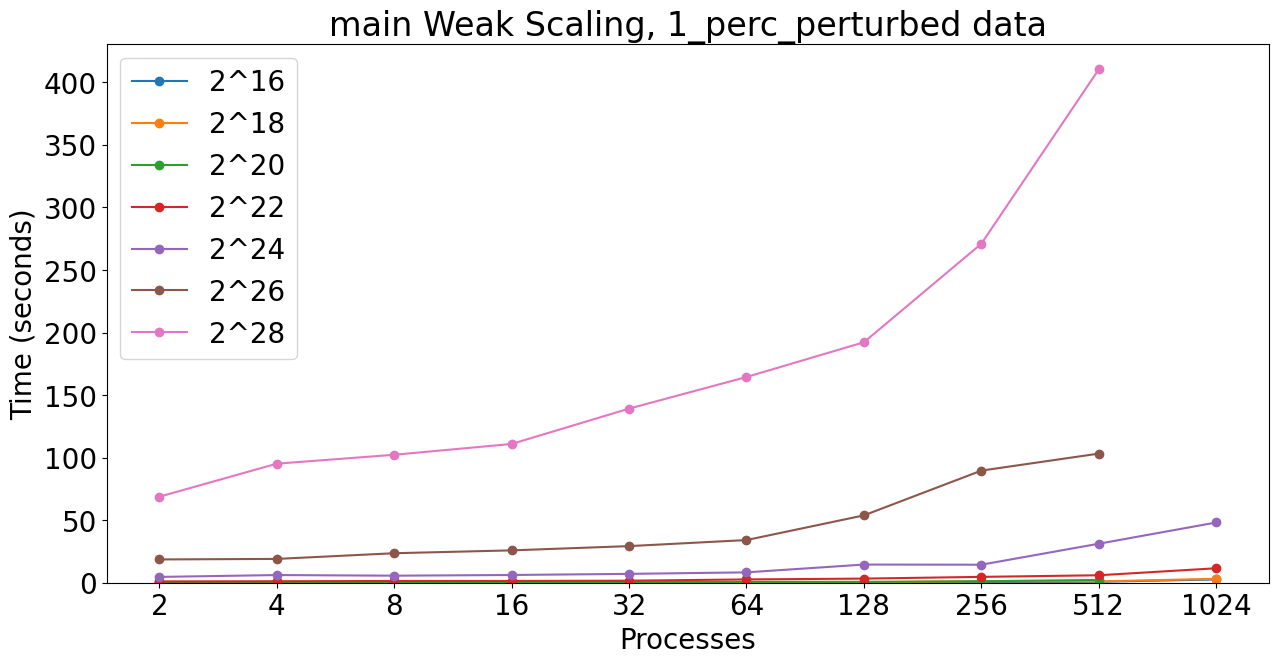

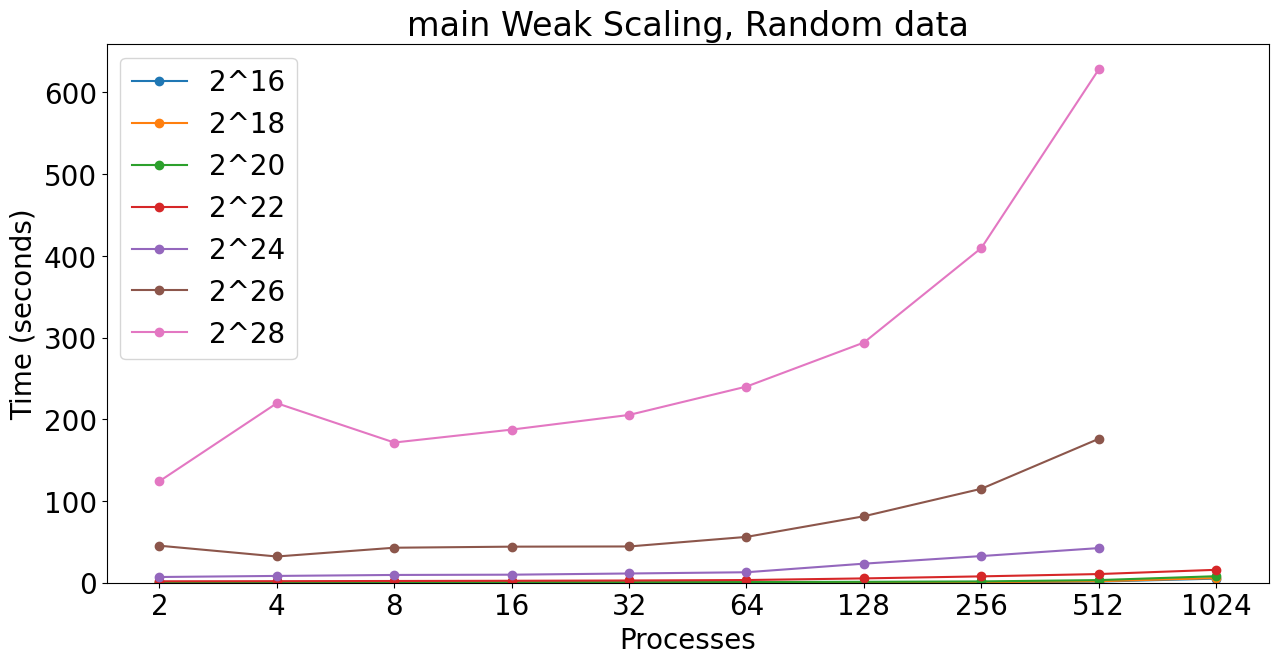

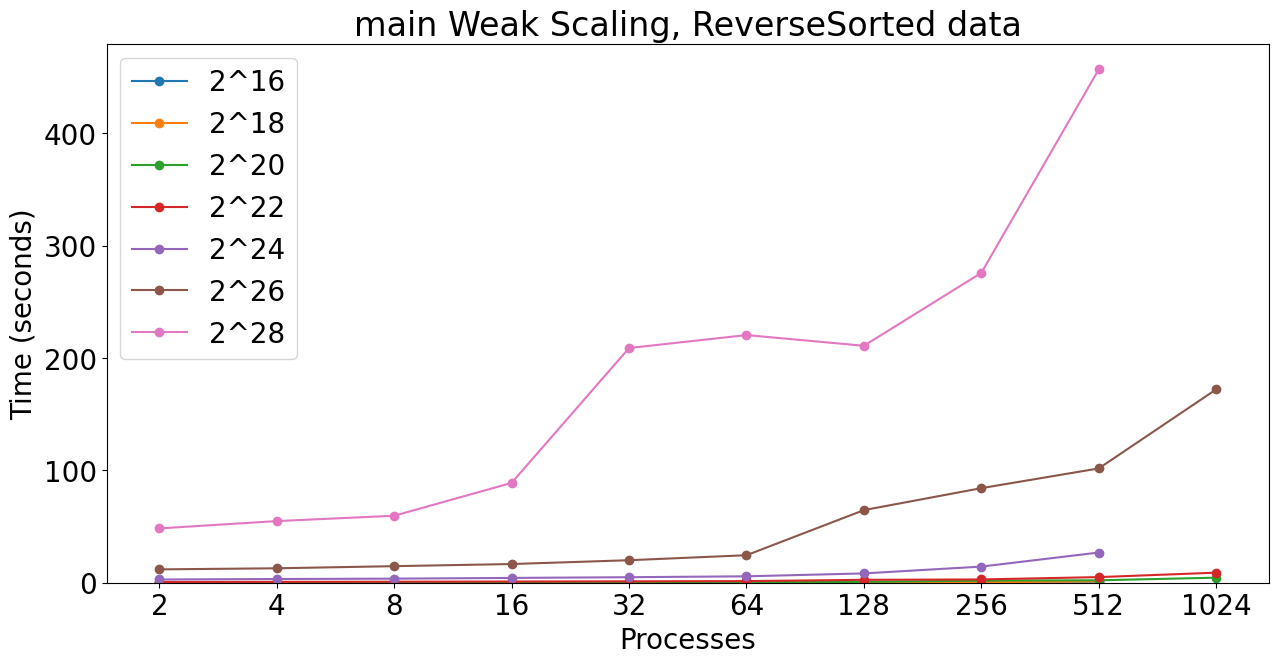

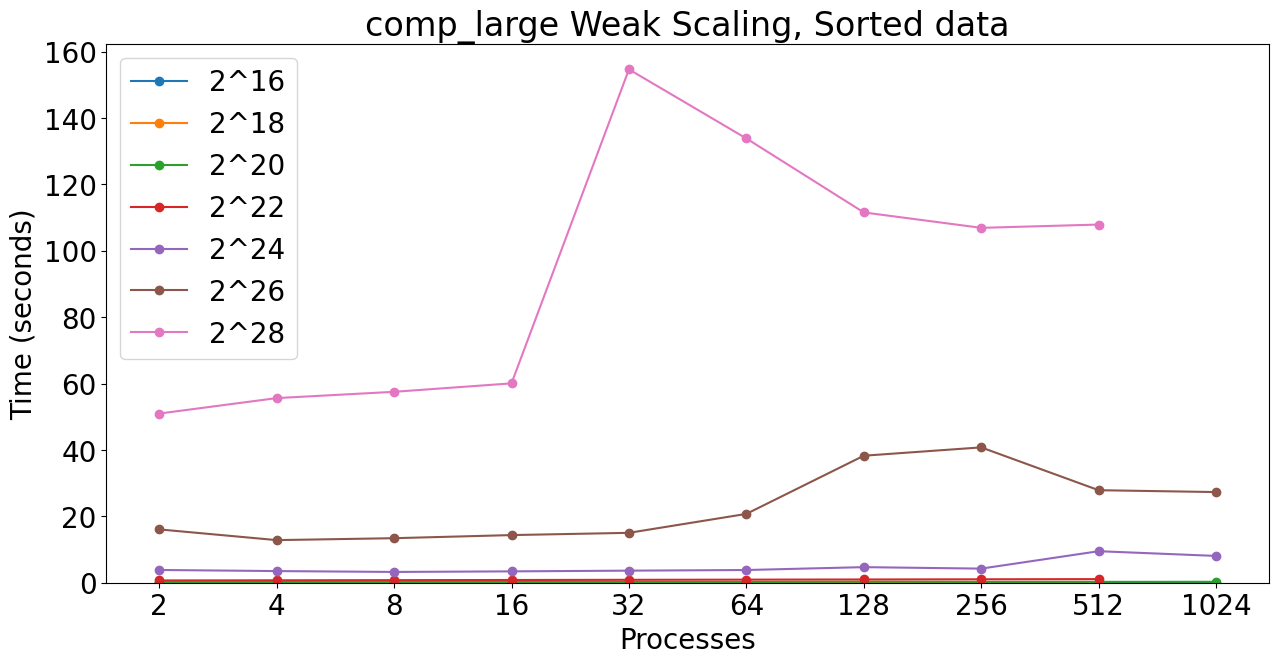

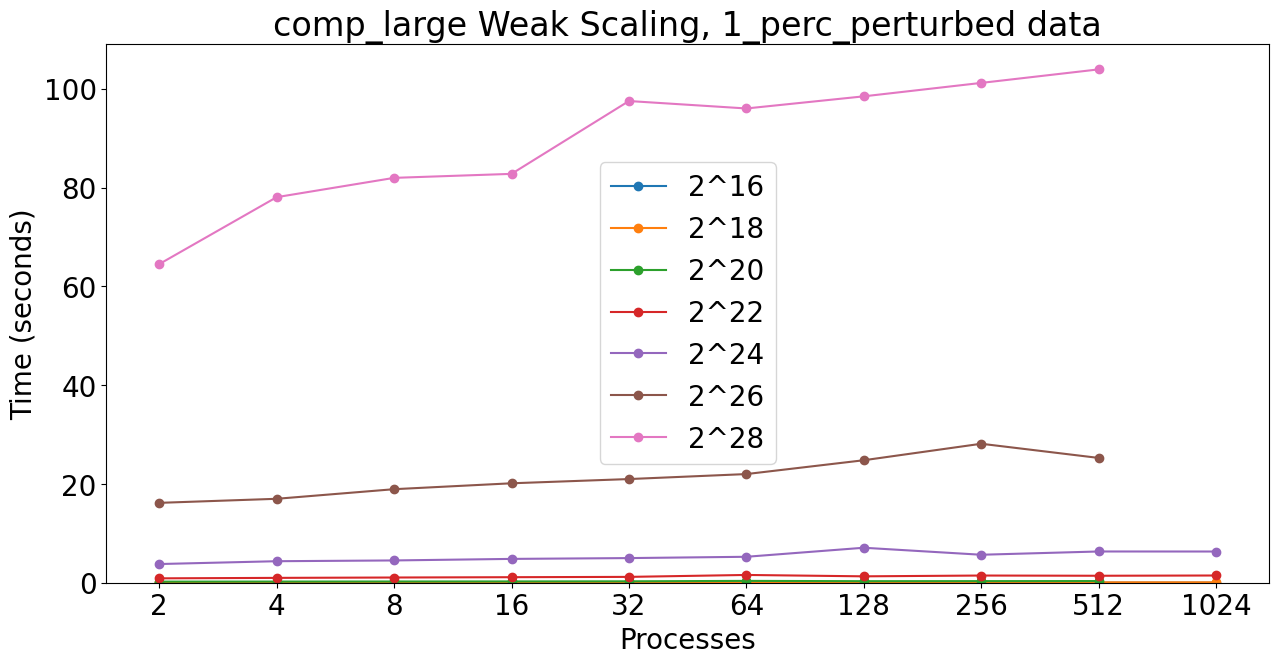

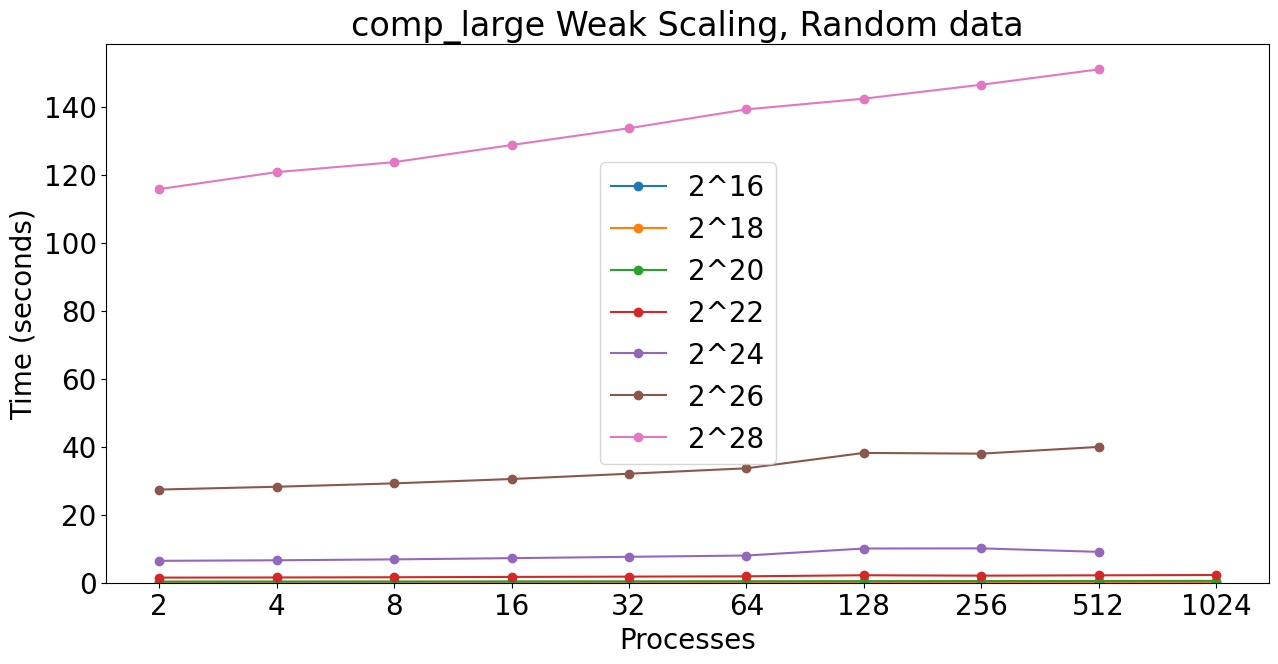

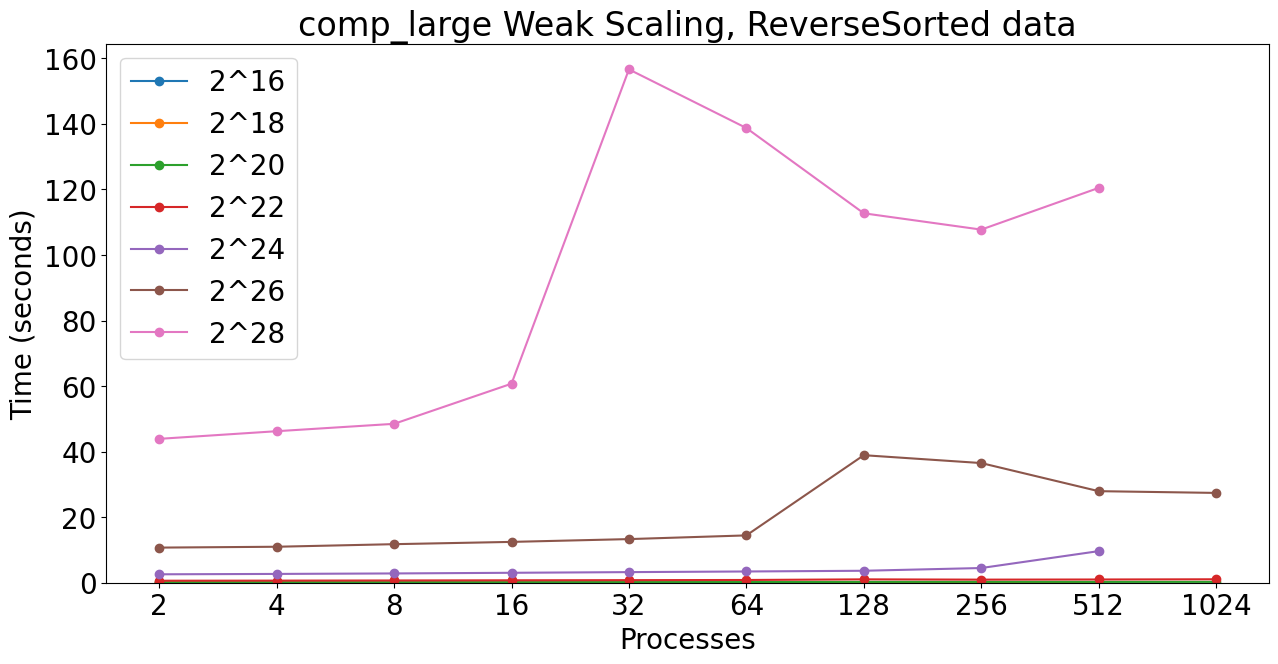

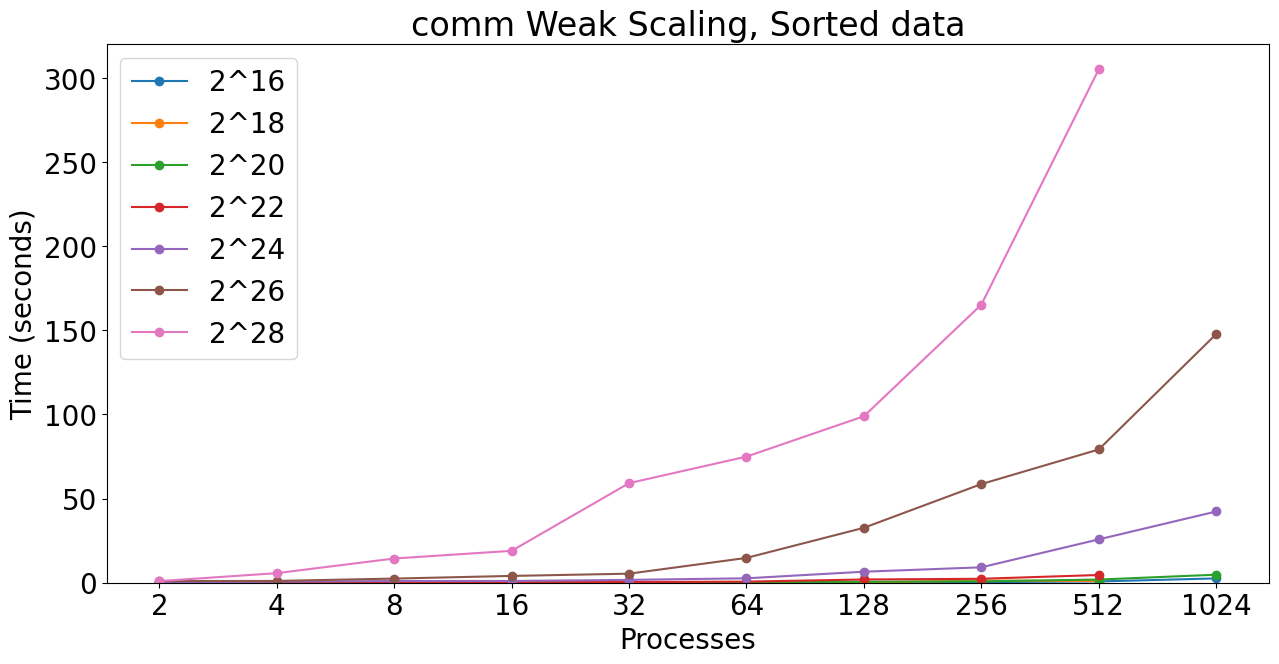

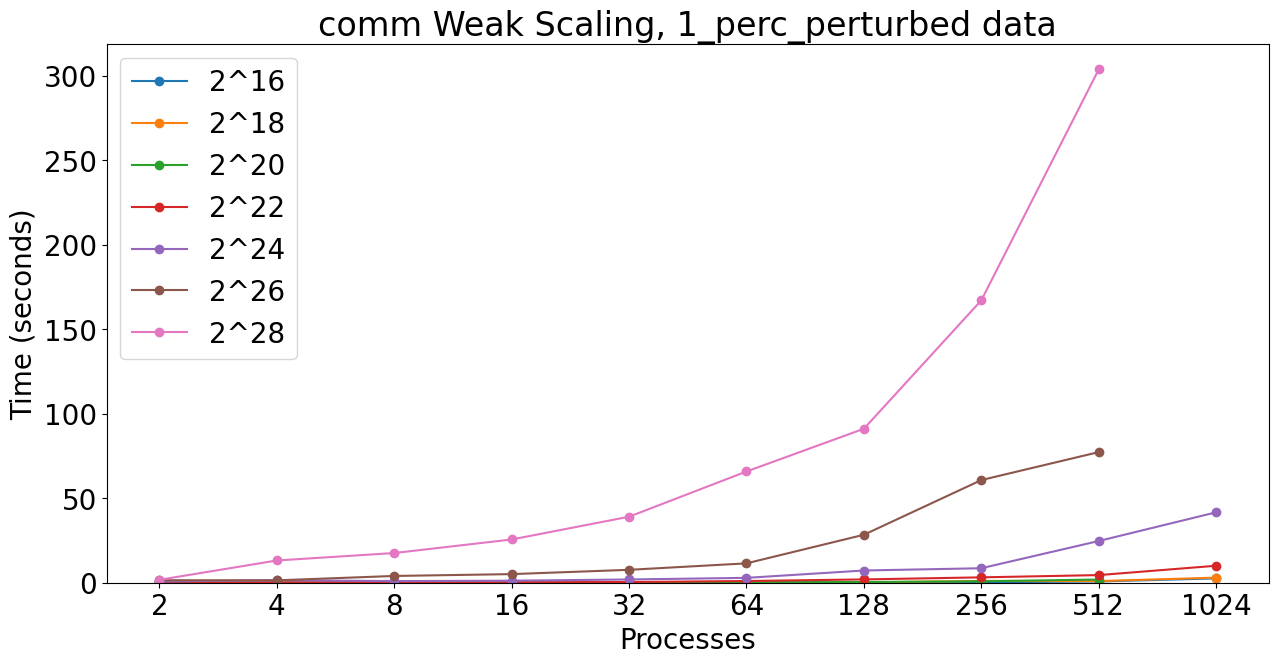

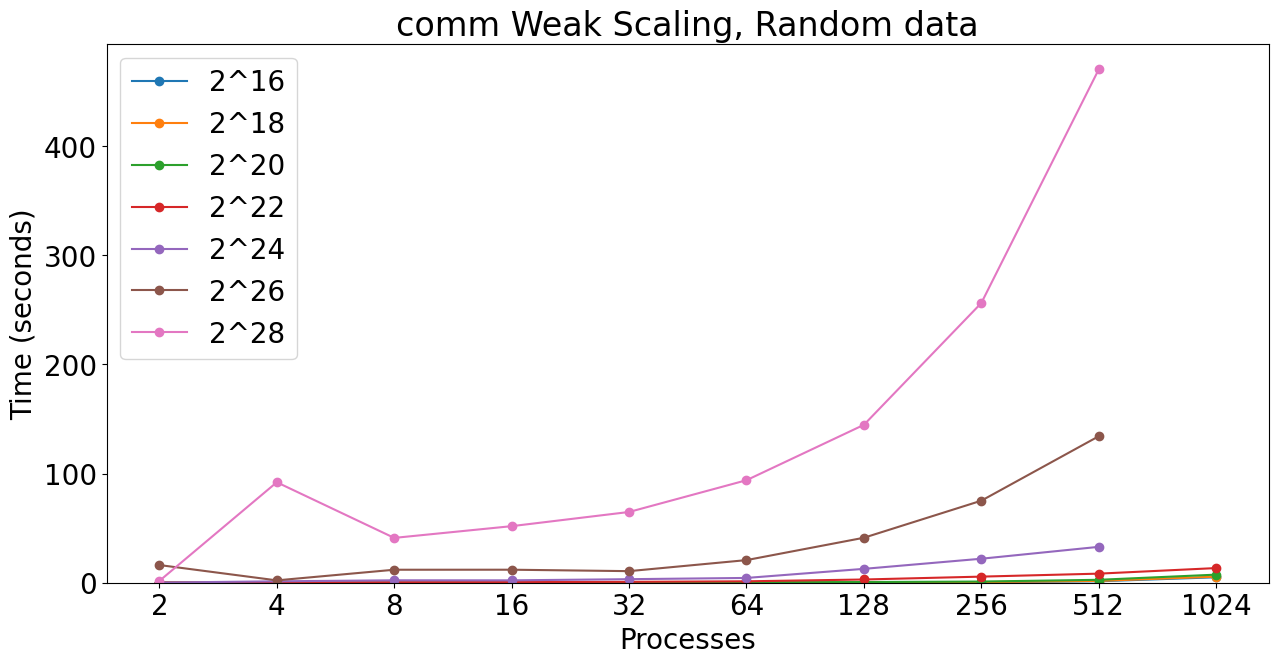

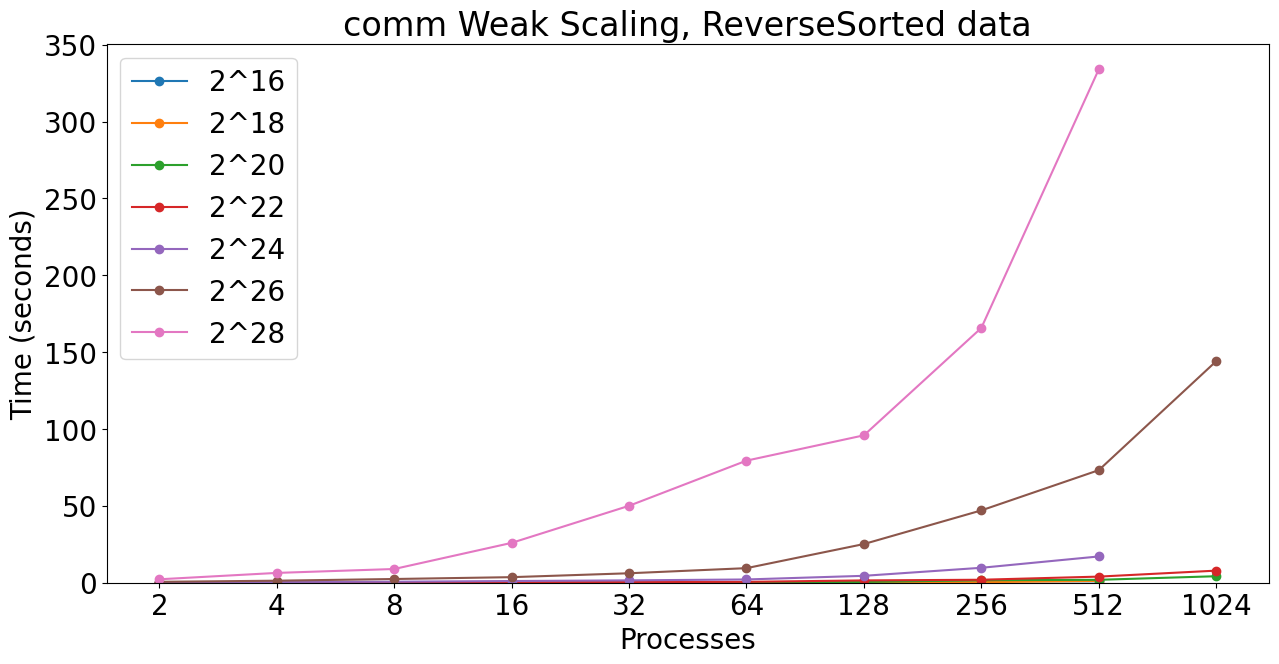

In [21]:

categories = ["main", "comp_large", "comm"]

for cat in categories:
    for type in input_types:
        df = tk.dataframe[tk.dataframe["name"] == cat]
        df = df[df["input_type"] == type]
        df = df.loc[:, ["Avg time/rank", "num_procs", "input_type"]]

        df = df.pivot_table(index = 'input_size', columns='num_procs',values='Avg time/rank', aggfunc = "sum")
        df = df.replace(f"{type}{type}", "NaN").reset_index().set_index("input_size")
        # print(df.head())
        plot_mpl(
            df.transpose(),
            title = f"{cat} Weak Scaling, {type} data",
            xlabel="Processes",
            ylabel="Time (seconds)",
        )